In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def predict(x_row, w_vals):
    return sum(w * x for w, x in zip(w_vals, x_row))

In [3]:
def cost(y_rows, x_rows, w_vals):
    error_sum = 0
    for y, x_row in zip(y_rows, x_rows):
        prediction = predict(x_row, w_vals)
        error = (y - prediction) ** 2
        error_sum += error
    return error_sum / (2 * len(y_rows))

In [4]:
def gradient_descend(y_rows, x_rows, w_vals, lr):
    for w_i in range(len(w_vals)):
        for x_i in range(len(x_rows)):
            error = (y_rows[x_i] - predict(x_rows[x_i], w_vals)) 
            w_vals[w_i] += lr * (1 / len(y_rows)) * error * x_rows[x_i][w_i]
    return w_vals

In [5]:
def learn(y_rows, x_rows, w_vals, lr, max_iterations, verbose=False, plot=False):
    costs = []
    for i in range(max_iterations):
        w_vals = gradient_descend(y_rows, x_rows, w_vals, lr)
        current_cost = cost(y_rows, x_rows, w_vals)
        costs.append(current_cost)
        if verbose:
            print(f"Iteration: {i} | Cost: {current_cost}")
    if plot:
        plt.plot(costs, [_ for _ in range(max_iterations)])
        plt.show()
    return w_vals

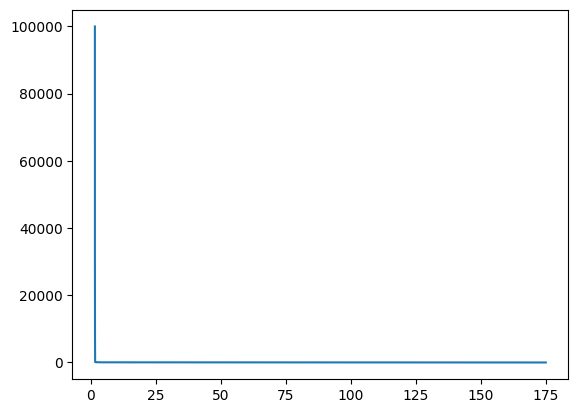

Weight: [2.47557079933304, 1.697326494521811, -0.6556346565093328, 1.7776102751955278]


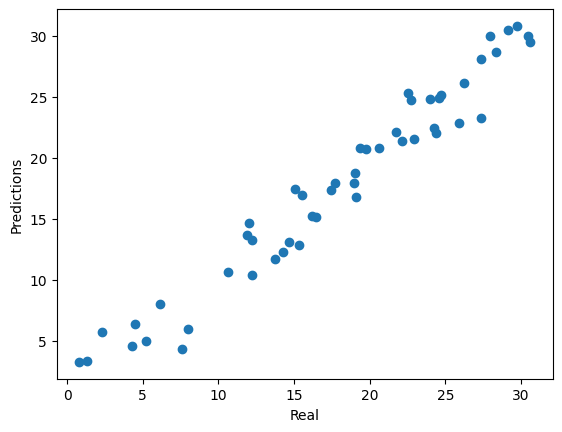

In [6]:
data = pd.read_csv("data/housing_prices.csv")
data.dropna()

features = ['square_feet', 'bed_rooms', 'toilets']

x_cols = [data[key].to_list() for key in features]
x_cols.append([1 for _ in x_cols[0]])
w_vals = [0, 0, 0, 0]

x_pre_weight = 1
y_pre_weight = 1

y_rows = [y * y_pre_weight for y in data['price_in_thousands'].to_list()]
x_rows = [x * x_pre_weight for x in np.transpose(np.array(x_cols)).tolist()]

learning_rate = 0.001
max_iterations = 100000
w_vals = learn(y_rows, x_rows, w_vals, learning_rate, max_iterations, verbose=False, plot=True)

print("Weight:", w_vals)

predictions = [predict(x_row, w_vals) for x_row in x_rows]

vals_to_plot = np.transpose(np.array([y_rows, predictions]))
df = pd.DataFrame(vals_to_plot).sort_values(by=0)

# Plotting predictions vs. real values
plt.scatter(x=df[0], y=df[1])
plt.xlabel("Real")
plt.ylabel("Predictions")
plt.show()